<h1 align="center"> Assignment - 3 (Machine Learning) </h1>

<h2 align="left"> Polynomial Regression and LASSO </h2> 
<h4 align="right" > 
    Author: <a href="https://jimut123.github.io/">Jimut Bahan Pal </a>
</h4> 

#### As usual, importing the necessary libraries

In [1]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
from sklearn import linear_model
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
sns.set()

## Part - 1

#### Generating artificial data from a second-order polynomial equation with added Gaussian noise

$$y = x^2 - 4x + \epsilon$$ where $\epsilon$ is the Gaussian noise.

In [2]:
# creation of Artificial data

# set the seed timer stuff
np.random.seed(4)
X = np.random.rand(50,1)*20  # 50 random numbers chosen from the interval [0,20) <1D input data>
epsilon = np.random.normal(0,8,(50,1))  # noise associated with each output data

y = X*X - 4*X + epsilon  # corresponding output data

# just a auxiallary data for extra plotting and stuffs, not to be confused with the original 
# train and test dataset
ploy_func_x = X[:-10, :]                     # this is the training data for X
ploy_func_y_full = X*X - 4*X
poly_func_y = ploy_func_y_full[:-10, :]      # this is the training data for y

poly_func_x_test = X[-10:, :]                # this is the testing data for X
poly_func_y_test = ploy_func_y_full[-10:, :] # this is the testing data for y

## Part - 2

#### Segregating the data into training and test datasets

In [3]:

# make the train test split
# training data

X_train = X[ :-10, : ]
y_train = y[ :-10, : ]


# test data

X_test = X[ -10: , : ]
y_test = y[ -10: , : ]

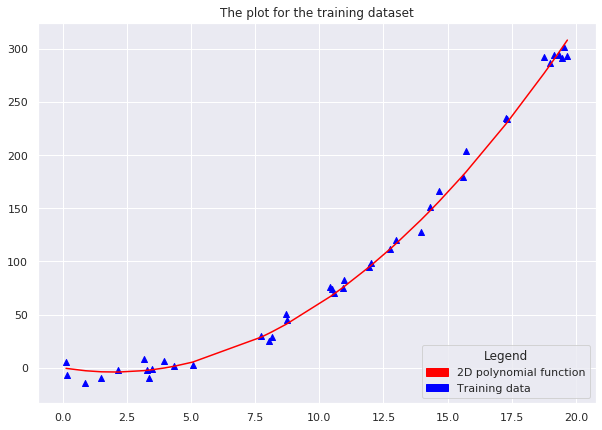

In [4]:
#fig = plt.figure(figsize=(16,9))
# just for the visualisation of the original function with the training data
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title('The plot for the training dataset')

#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
new_X, new_y = zip(*sorted(zip(ploy_func_x, poly_func_y))) # sort values for plotting

test_new_X, test_new_y = zip(*sorted(zip(poly_func_x_test, poly_func_y_test))) # sort values for plotting

plt.plot(new_X, new_y,color='red')
plt.scatter(X_train,y_train, marker='^',color='blue')

red_patch = mpatches.Patch(color='red', label='2D polynomial function')
blue_patch = mpatches.Patch(color='blue', label='Training data')
plt.legend(handles=[red_patch,blue_patch],loc="lower right", title="Legend")


ax.grid(True)

plt.show()

## Part - 3

#### Modeling the data using a tenth-order polynomial with Linear Regression (basis functions approach).

In [5]:

# creating the polynomial linear regression stuffs
polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(X_train)

# creating the test dataset in the form by fit_transform
x_poly_test = polynomial_features.fit_transform(X_test)

model = LinearRegression()
# the actual training
model.fit(x_poly, y_train)
# predicting the test dataset
y_poly_pred = model.predict(x_poly_test)



## Part - 4

#### Computing the root mean squared error (RMSE) on the test dataset

In [6]:
# calculating the RMSE and R2 score on the test dataset
rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
r2 = r2_score(y_test,y_poly_pred)

print("Root Mean Squared Error : ",rmse)
print("R2 score : ",r2)

Root Mean Squared Error :  12.152467512217232
R2 score :  0.9451922229176698


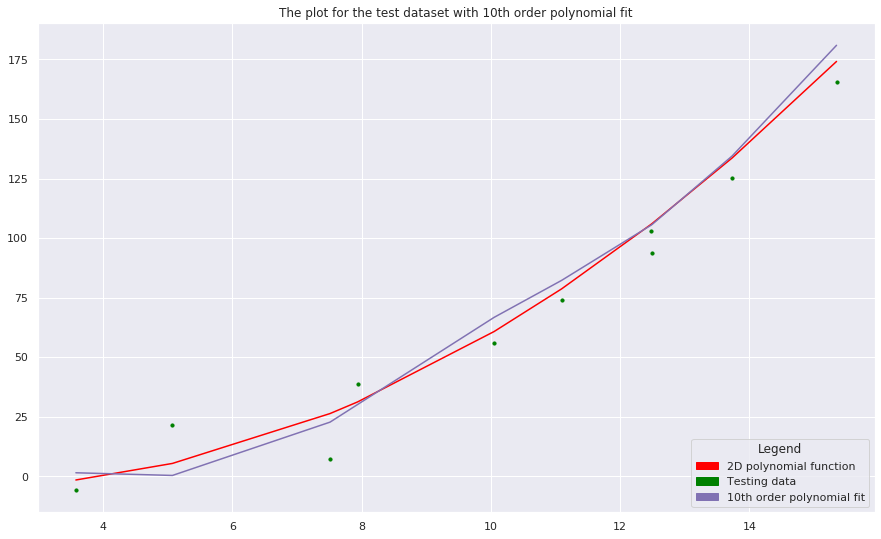

In [7]:

# plotting the dataset with the poly-Linear Regression fit

fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('The plot for the test dataset with 10th order polynomial fit')
#plt.scatter(X_train, y_train, s=10)
# sort the values of x before line plot
#sort_axis = operator.itemgetter(0)

plt.scatter(X_test, y_test, s=10,color='green')

#new_X, new_y = zip(*sorted(zip(ploy_func_x, poly_func_y))) # sort values for plotting
plt.plot(test_new_X, test_new_y,color='red')
#plt.scatter(X_train,y_train, marker='^',color='blue')


sorted_zip = sorted(zip(X_test,y_poly_pred))#, key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')

tenthp_patch = mpatches.Patch(color='m', label='10th order polynomial fit')
red_patch = mpatches.Patch(color='red', label='2D polynomial function')
blue_patch = mpatches.Patch(color='green', label='Testing data')
plt.legend(handles=[red_patch,blue_patch,tenthp_patch],loc="lower right", title="Legend")
ax.grid(True)
plt.show()

## Part - 5

#### Now performing the regularization using LASSO model. 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692.2438544202428, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(


Root Mean Squared Error for LASSO :  11.762489435681072
R2 score for LASSO :  0.9486533938436397


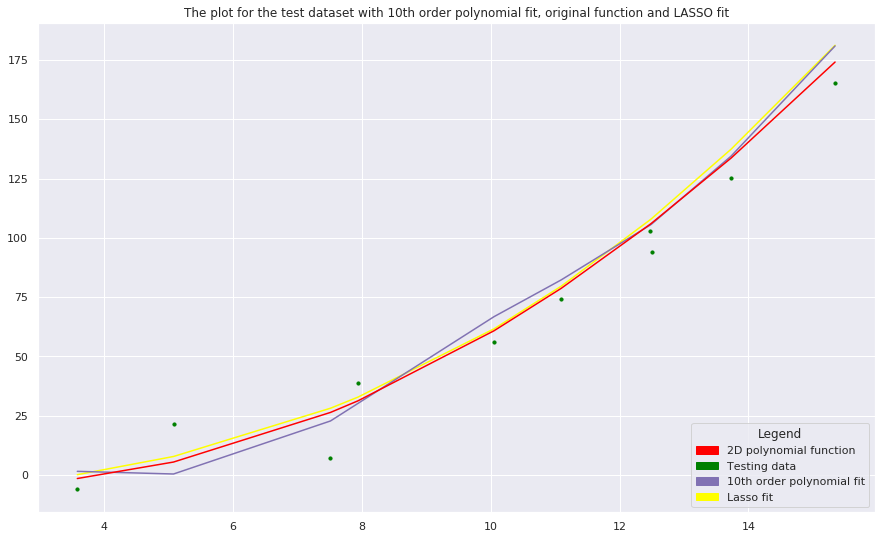

In [8]:
lasso_reg = linear_model.Lasso(alpha=0.0001, fit_intercept=True, normalize=True);
#fit_intercept to center the outputs y;
#normalize to standardize the features



lasso_reg.fit(x_poly, y_train)
#lasso_reg.fit(X_train, y_train)
y_poly_pred_lasso = lasso_reg.predict(x_poly_test)
#y_poly_pred_lasso = lasso_reg.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test,y_poly_pred_lasso))
r2_lasso = r2_score(y_test,y_poly_pred_lasso)

print("Root Mean Squared Error for LASSO : ",rmse_lasso)
print("R2 score for LASSO : ",r2_lasso)


polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(X_train)

x_poly_test = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly_test)



fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('The plot for the test dataset with 10th order polynomial fit, original function and LASSO fit')


sorted_zip = sorted(zip(X_test,y_poly_pred_lasso))#, key=sort_axis)
x_lasso, y_poly_pred_lasso = zip(*sorted_zip)
plt.plot(x_lasso, y_poly_pred_lasso, color='yellow')


sorted_zip = sorted(zip(X_test,y_poly_pred))
x_, y_poly_pred = zip(*sorted_zip)
plt.plot(x_, y_poly_pred, color='m')


plt.scatter(X_test, y_test, s=10,color='green')


#new_X, new_y = zip(*sorted(zip(ploy_func_x, poly_func_y))) # sort values for plotting
plt.plot(test_new_X, test_new_y,color='red')
#plt.scatter(X_train,y_train, marker='^',color='blue')



tenthp_patch = mpatches.Patch(color='m', label='10th order polynomial fit')
red_patch = mpatches.Patch(color='red', label='2D polynomial function')
blue_patch = mpatches.Patch(color='green', label='Testing data')
yellow_patch = mpatches.Patch(color='yellow', label='Lasso fit')
plt.legend(handles=[red_patch,blue_patch,tenthp_patch,yellow_patch],loc="lower right", title="Legend")
ax.grid(True)
plt.show()


#### Varying the regularization coefficient (alpha) and plotting the variation of RMSE on the test dataset versus alpha. Take alpha to be positive.

In [9]:
aplha_vs_rmse = []
for alpha_var in np.arange(0.00001,0.4,0.0001):
    #print(alpha)
    lasso_reg = linear_model.Lasso(alpha=alpha_var, fit_intercept=True, normalize=True);
    #fit_intercept to center the outputs y;
    #normalize to standardize the features
    lasso_reg.fit(x_poly, y_train)
    y_poly_pred_lasso = lasso_reg.predict(x_poly_test)
    rmse_lasso = np.sqrt(mean_squared_error(y_test,y_poly_pred_lasso))
    aplha_vs_rmse.append([alpha_var,rmse_lasso])
    #r2_lasso = r2_score(y_test,y_poly_pred_lasso)
    

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 790.0620798768259, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680.7547442594196, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562.8116425199963, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

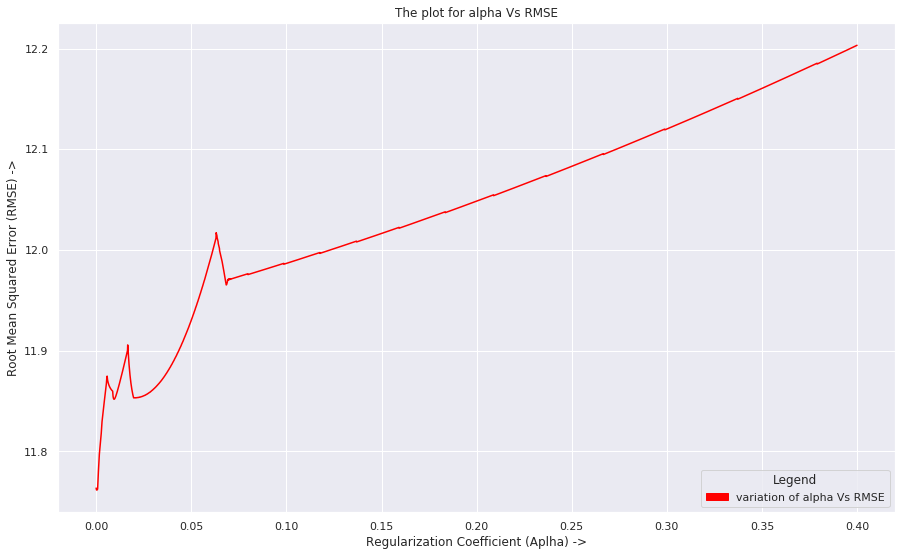

In [11]:
fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('The plot for alpha Vs RMSE')

plt.plot([i[0] for i in aplha_vs_rmse], [i[1] for i in aplha_vs_rmse], color='red')

red_patch = mpatches.Patch(color='red', label='variation of alpha Vs RMSE')
plt.ylabel('Root Mean Squared Error (RMSE) ->')
plt.xlabel('Regularization Coefficient (Aplha) ->') 
plt.legend(handles=[red_patch],loc="lower right", title="Legend")
ax.grid(True)

plt.show()

#### References

1. Dripta Maharaj, (2020), Slides, availabe on web <a href="https://sites.google.com/view/da220-2019-20"> https://sites.google.com/view/da220-2019-20 </a>, last accessed on 6.2.2020.


2. Jeremy Jordan, (2017), Polynomial regression, availabe on web <a href="https://www.jeremyjordan.me/polynomial-regression/"> https://www.jeremyjordan.me/polynomial-regression/ </a>, last accessed on 6.2.2020.


3. Numpy Contributors, (2018), numpy.random.normal, Scipy.org, availabe on web <a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html"> https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html </a>, last accessed on 6.2.2020.


4. Animesh Agarwal, (2018), Polynomial Regression, towardsdatascience.com, availabe on web <a href="https://towardsdatascience.com/polynomial-regression-bbe8b9d97491"> https://towardsdatascience.com/polynomial-regression-bbe8b9d97491 </a>, last accessed on 6.2.2020.


5. user:Kaggle, (2016), Difference between fit and fit_transform in scikit_learn models?, datascience.stackexchange.com, availabe on web <a href="https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models"> https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models </a>, last accessed on 6.2.2020.





#### Acknowledgements

* Dripta Maharaj